In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [13]:
path = 'C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/data/100x'

In [16]:
os.mkdir('data')

In [ ]:
os.listdir(path)

[]

In [15]:
os.rmdir('data')

In [1]:
import numpy as np

In [5]:
from error_algorithms import IoU

In [6]:
groundarray = np.array([[0,3,3,3,0],
                        [2,0,1,0,0],
                        [2,0,1,0,0],
                        [2,0,1,0,0],
                        [0,0,0,0,0]])

imagearray = np.array([[0,0,3,3,0],
                       [2,0,0,1,0],
                       [2,0,1,0,0],
                       [2,0,1,0,0],
                       [2,0,0,0,0]])

In [7]:
print(np.where(groundarray == 1 or imagearray == 1))
print(np.where(groundarray == 1 and imagearray == 1))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
print(groundarray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(groundarray[np.where(groundarray == 1) or np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) or np.where(imagearray == 1)])

[0 1 1]
[1 1 1]
[1 1 1]
[0 1 1]


In [18]:
print(groundarray[np.where(np.any(groundarray == 1 and imagearray == 1))])
print(groundarray[np.where(groundarray == 1) or np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) or np.where(imagearray == 1)])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
print(groundarray[np.any(np.where(groundarray == 1) and np.where(imagearray == 1))])
print(groundarray[np.where(groundarray == 1) or np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) or np.where(imagearray == 1)])

[[[0 3 3 3 0]
  [2 0 1 0 0]
  [2 0 1 0 0]
  [2 0 1 0 0]
  [0 0 0 0 0]]]
[1 1 1]
[1 1 1]
[0 1 1]


In [91]:
a = np.where(groundarray == 1)
b = np.where(imagearray == 1)

In [81]:
acs = np.array([a[0],a[1]]).T
bcs = np.array([b[0],b[1]]).T

In [90]:
tupa = [tuple(item) for item in acs]
tupb = [tuple(item) for item in bcs]
print(len(set(tupa).union(tupb)))
print(len(set(tupa).intersection(tupb)))

4
2


In [93]:
def andoveror(a,b):
    acs = np.array([a[0],a[1]]).T
    bcs = np.array([b[0],b[1]]).T
    tupa = [tuple(item) for item in acs]
    tupb = [tuple(item) for item in bcs]
    return len(set(tupa).intersection(tupb))/len(set(tupa).union(tupb))

In [94]:
andoveror(a,b)

0.5

In [25]:
print(b or a)
print(a)
print(b)

(array([1, 2, 3], dtype=int64), array([3, 2, 2], dtype=int64))
(array([1, 2, 3], dtype=int64), array([2, 2, 2], dtype=int64))
(array([1, 2, 3], dtype=int64), array([3, 2, 2], dtype=int64))


In [63]:
ax = list(a[0])
ay = list(a[1])
bx = list(b[0])
by = list(b[1])

In [67]:
print([ax,ay,ax])

[[1, 2, 3], [2, 2, 2], [1, 2, 3]]


In [69]:
print(list(zip([ax,ay,ax])))

[([1, 2, 3],), ([2, 2, 2],), ([1, 2, 3],)]


In [74]:
acs = np.array([ax,ay]).T
bcs = np.array([bx,by]).T

In [75]:
for a in acs:
    print(type(a))
    print(a)

<class 'list'>
[1, 2]
<class 'list'>
[2, 2]
<class 'list'>
[3, 2]


In [76]:
new = set(acs).intersection(bcs)
print(new)

TypeError: unhashable type: 'list'

In [53]:
thing = {(1,2),(1,3),(1,4)}

In [55]:
print(len(thing))
print(type(thing))

3
<class 'set'>


In [95]:
a = None
b = 3
a % b

TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [96]:
b%a

TypeError: unsupported operand type(s) for %: 'int' and 'NoneType'

In [2]:
indices = random.sample(range(500),20)
for i,x in enumerate(indices):
    print(x == indices[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [5]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from scipy import ndimage
from error_algorithms import IoU
from scipy import stats
from scipy.ndimage import gaussian_filter
from interpolate import linear_interpolate
import random
from PIL import Image
from glob import glob

In [108]:
img = tifffile.imread("fluo/30x test/bernsen/synth_00001bernsen.tif")/255
img, num_features = ndimage.label(img, np.ones((3,3)))
mask = tifffile.imread("fluo/30x test/masks/synth_00001.tif")
real = gaussian_filter(tifffile.imread("fluo/30x test/convolutions/synth_00001.tif"),1)
real2 = tifffile.imread("fluo/30x test/convolutions/synth_00001.tif")
#check whether IoU actually penalises for missing a whole cell

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


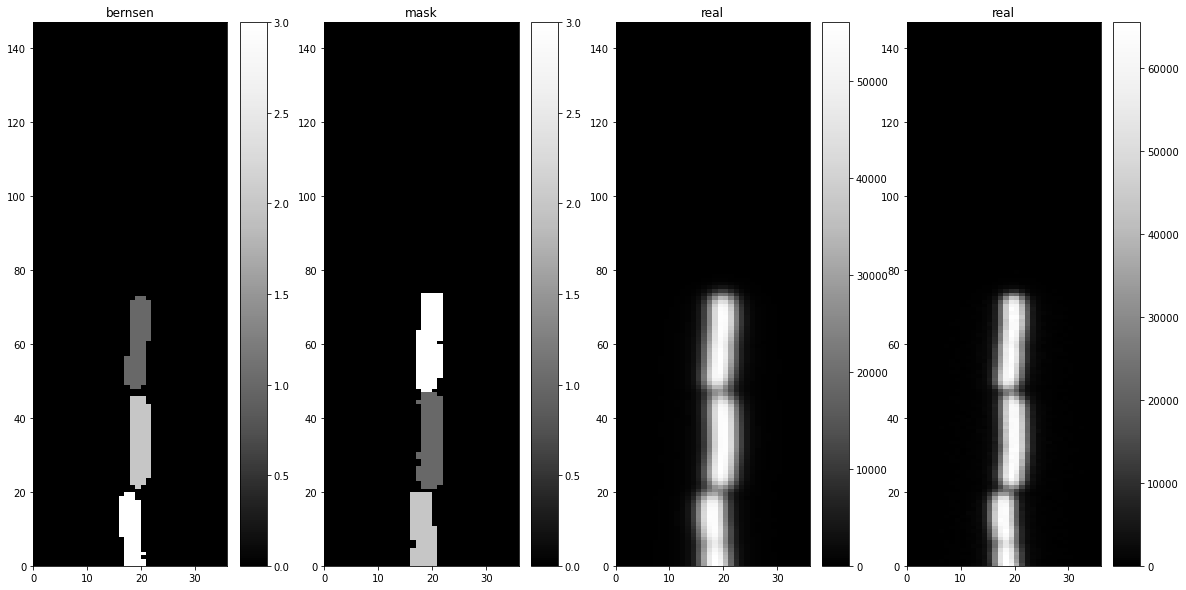

In [109]:
plt.rcParams["figure.figsize"] = [20,10]
fig, axs = plt.subplots(1,4)
thing1 = axs[0].pcolor(img[::-1],cmap="Greys_r")
axs[0].set_title("bernsen")
plt.colorbar(thing1, ax=axs[0])
thing2 = axs[1].pcolor(mask[::-1],cmap="Greys_r")
axs[1].set_title("mask")
plt.colorbar(thing2,ax=axs[1])
thing3 = axs[2].pcolor(real[::-1],cmap="Greys_r")
axs[2].set_title("real")
plt.colorbar(thing3,ax=axs[2])
thing4 = axs[3].pcolor(real2[::-1],cmap="Greys_r")
axs[3].set_title("real")
plt.colorbar(thing4,ax=axs[3])
plt.show()

In [101]:
arr = IoU(mask,img)
arr, np.mean(arr[:,0]/arr[:,1])

(array([[ 93, 109],
        [ 72,  89],
        [ 92, 118]]),
 0.8139535967228028)

In [2]:
import os
import shutil

In [111]:
for dir in os.listdir("omnipose_SyMBac_TD_fl"):
    if "x test" in dir:
        print(dir)
        os.mkdir("omnipose_SyMBac_TD_fl/"+dir+"/otsu")
        os.mkdir("omnipose_SyMBac_TD_fl/"+dir+"/bernsen")
        os.mkdir("omnipose_SyMBac_TD_fl/"+dir+"/watershed")

100x test
20x test
25x test
30x test
35x test
40x test
60x test


In [114]:
os.listdir("omnipose_SyMBac_TD_fl/100x test/")

['bernsen',
 'convolutions',
 'masks',
 'omnipose segmentations',
 'otsu',
 'stardist',
 'watershed']

In [123]:
name = "fluo"
for dir in os.listdir(name):
    if "x test" in dir:
        print(dir)
        for file in os.listdir(name+"/"+dir+"/bernsen"):
            if "watershed" in file:
                shutil.move(name+"/"+dir+"/bernsen/"+file,name+"/"+dir+"/watershed/"+file)

100x test
20x test
25x test
30x test
35x test
40x test
60x test


In [6]:
name = "fluo/"
for dir in os.listdir(name):
    if "x test" in dir:
        print(dir)

100x test


AttributeError: module 'os' has no attribute 'mv'

In [3]:
from PIL import Image

In [5]:
name = "fluo/"
for dir in os.listdir(name):
    if "x test" in dir:
        newdir = name+dir[:4]+"blur/"
        try:
            os.mkdir(newdir)
            os.mkdir(newdir+"convolutions")
            os.mkdir(newdir+"masks")
            os.mkdir(newdir+"watershed")
            os.mkdir(newdir+"bernsen")
            os.mkdir(newdir+"otsu")
        except:
            pass
        for file in os.listdir(name+dir+"/convolutions"):
            img = tifffile.imread(name+dir+"/convolutions/"+file)
            mask = tifffile.imread(name+dir+"/masks/"+file)
            if "20" in dir:
                img = linear_interpolate(gaussian_filter(img,2),(256//(100/20),46//(100/20)))
                mask = linear_interpolate(mask,(256//(100/20),46//(100/20)))
            elif "25" in dir:
                img = linear_interpolate(gaussian_filter(img,1.78),(256//(100/25),46//(100/25)))
                mask = linear_interpolate(mask,(256//(100/25),46//(100/25)))
            elif "30" in dir:
                img = linear_interpolate(gaussian_filter(img,1.59),(256//(100/30),46//(100/30)))
                mask = linear_interpolate(mask,(256//(100/30),46//(100/30)))
            elif "35" in dir:
                img = linear_interpolate(gaussian_filter(img,1.41),(256//(100/35),46//(100/35)))
                mask = linear_interpolate(mask,(256//(100/35),46//(100/35)))
            elif "40" in dir:
                img = linear_interpolate(gaussian_filter(img,1.26),(256//(100/40),46//(100/40)))
                mask = linear_interpolate(mask,(256//(100/40),46//(100/40)))
            elif "60" in dir:
                img = linear_interpolate(gaussian_filter(img,1.12),(256//(100/60),46//(100/60)))
                mask = linear_interpolate(mask,(256//(100/60),46//(100/60)))
            elif "100" in dir:
                img = linear_interpolate(gaussian_filter(img,1),(256//(100/100),46//(100/100)))
                mask = linear_interpolate(mask,(256//(100/100),46//(100/100)))
            img = Image.fromarray(img)
            img.save(newdir+"convolutions/"+file)
            mask = Image.fromarray(mask)
            mask.save(newdir+"masks/"+file)

In [6]:
None!=3

True

In [12]:
from scipy import fft

In [5]:
import error_algorithms
from scipy.spatial.distance import cdist

In [2]:
from interpolate import linear_interpolate

In [6]:
img = tifffile.imread("fluo/100x test/convolutions/synth_00006.tif")
mask = tifffile.imread("fluo/100x test/masks/synth_00006.tif")
water,_ = ndimage.label(tifffile.imread("fluo/100x test/watershed/synth_00006watershed.tif"),structure=np.ones([3,3]))
otsu,_ = ndimage.label(tifffile.imread("fluo/100x test/otsu/synth_00006otsu.tif"),structure=np.ones([3,3]))

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [7]:
water_centroids, water_areas = error_algorithms.find_cell_info(water)
otsu_centroids, otsu_areas = error_algorithms.find_cell_info(otsu)
mask_centroids, mask_areas = error_algorithms.find_cell_info(mask)

In [8]:
water_centroids.shape

(3, 2)

In [9]:
mask_centroids[np.argmin(cdist(water_centroids, mask_centroids),axis=-1)]

array([[ 60.24094203,  19.57427536],
       [134.58667883,  22.71624088],
       [205.67896311,  24.97906281]])

In [10]:
water_centroids

array([[ 60.39485981,  19.45794393],
       [134.4159812 ,  22.75323149],
       [205.38151042,  24.95572917]])

In [11]:
cdist(otsu_centroids, mask_centroids)

array([[ 74.0708067 ,   0.34791732, 145.19676588],
       [ 33.75529756, 108.16599317,  37.37300041]])

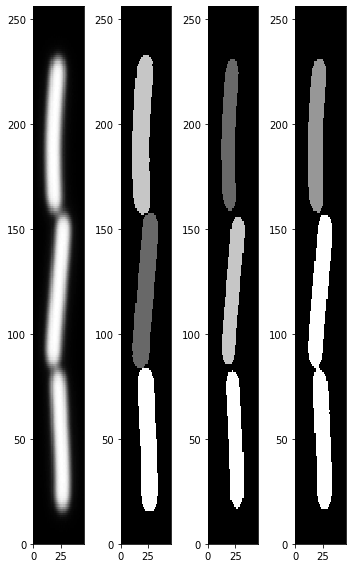

In [12]:
fig, axs = plt.subplots(1,4,figsize=(5,8))
axs[0].pcolor(img[::-1],cmap="Greys_r")
axs[1].pcolor(mask[::-1],cmap="Greys_r")
axs[2].pcolor(water[::-1],cmap="Greys_r")
axs[3].pcolor(otsu[::-1],cmap="Greys_r")
fig.tight_layout()
plt.show()

In [15]:
error_algorithms.segmentation_accuracy(mask, [water, otsu])

[1.0, 0.3333333333333333]

In [20]:
error_algorithms.centroid_distances(mask, otsu)

(array([[168.32550519,  23.77061715],
        [ 60.58480749,  19.52133195],
        [168.32550519,  23.77061715]]),
 array([33.75529756,  0.34791732, 37.37300041]))

In [21]:
error_algorithms.centroid_distances(mask, water)

(array([[134.4159812 ,  22.75323149],
        [ 60.39485981,  19.45794393],
        [205.38151042,  24.95572917]]),
 array([0.17465963, 0.19293441, 0.29836649]))

In [6]:
import os
import shutil

In [4]:
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1092_cubic")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1638_cubic")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1092_cubic/test")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1638_cubic/test")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1092_cubic/train")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1638_cubic/train")

In [49]:
main_dir = "superres/first_trial/omnipose_training/pmc_0.1092/train/"
new_dir =  "superres/first_trial/omnipose_training/pmc_0.1092_cubic/train/"

for file in os.listdir(main_dir+"convolutions"):
    img = Image.fromarray(linear_interpolate(np.array(Image.open(main_dir+"convolutions/"+file)),(256,1840)))
    img = img.convert("L")
    img.save(new_dir+"convolutions_linear/"+file,"png")

for file in os.listdir(main_dir+"masks/"):
    img = Image.open(main_dir+"masks/"+file)
    img = img.convert("L")
    img.save(new_dir+"masks_linear/"+file,"png")

In [41]:
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1092_linear/test/masks_linear")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1638_linear/test/masks_linear")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1092_linear/test/convolutions_linear")
os.mkdir("superres/first_trial/omnipose_training/pmc_0.1638_linear/test/convolutions_linear")

In [62]:
os.mkdir("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.0655")
os.mkdir("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.1092")
os.mkdir("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.1638")

In [31]:
os.mkdir("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/main_batch/pmc_0.1092/test/conv_linear")
os.mkdir("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/main_batch/pmc_0.1638/test/conv_linear")

In [34]:
direc = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/main_batch/pmc_0.1638/test/"

for file in os.listdir(direc+"convolutions/"):
    img = Image.fromarray(np.rint(linear_interpolate(tifffile.imread(direc+"convolutions/"+file),(256,46))).astype(int))
    if "0655" in file:
        img.save(direc+"pmc_0.0655/"+file[:-3]+"png")
    elif "1092" in file:
        img.save(direc+"conv_linear/"+file[:-3]+"png")
    elif "1638" in file:
        img.save(direc+"conv_linear/"+file[:-3]+"png")

In [28]:
maxs = []
dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.0655/"
for file in os.listdir(dir):
    img = np.array(Image.open(dir+file).convert("L"))
    maxs.append(np.max(img))

In [29]:
np.max(maxs)

255

In [30]:
img.shape

(256, 46)

In [27]:
img = img.transpose([2,0,1])
img.shape

(3, 256, 46)

In [9]:
string = "/test.ipynb"
insert = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2"

In [10]:
%%timeit
out = insert + string

70.4 ns ± 2.62 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [11]:
insert = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2"


In [12]:
%%timeit
string = f"{insert}/test.ipynb"

66.3 ns ± 0.285 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [10]:
def open_image(filename):
    if "tif" in filename:
        img = np.array(tifffile.imread(filename),dtype=np.float32)
    elif "png" in filename:
        img = np.array(Image.open(filename),dtype=np.float32)
    else:
        raise TypeError(f"Images must be tif files or png files, not {filename[-3:]}")
    return img

In [22]:
from glob import glob
import random

In [7]:
HR_TRAIN_DIR = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655/masks/"
HR_TEST_DIR  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655/masks/"

LR_TRAIN_DIR_100 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655/convolutions/"
SR_TRAIN_DIR_100 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655/masks/"
LR_TEST_DIR_100  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655/convolutions/"
SR_TEST_DIR_100  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655/masks/"

LR_TRAIN_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092/convolutions/"
SR_TRAIN_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic/"
LR_TEST_DIR_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092/convolutions/"
SR_TEST_DIR_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic/"

LR_TRAIN_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638/convolutions/"
SR_TRAIN_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic/"
LR_TEST_DIR_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638/convolutions/"
SR_TEST_DIR_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic/"

METHOD = "cubic"
hr_image = np.ones([256,46])

In [18]:
for file in os.listdir(LR_TRAIN_DIR_60):
    lr_image = open_image(LR_TRAIN_DIR_60+file)
    upsampled = linear_interpolate(lr_image,target_shape=hr_image.shape,method=METHOD)
    upsampled[upsampled > 65535] = 65535
    upsampled = (upsampled//256)
    sr_image = Image.fromarray(upsampled).convert("L")
    sr_image.save(SR_TRAIN_DIR_60+file[:-3]+"png")
for file in os.listdir(LR_TEST_DIR_60):
    lr_image = open_image(LR_TEST_DIR_60+file)
    upsampled = linear_interpolate(lr_image,target_shape=hr_image.shape,method=METHOD)
    upsampled[upsampled > 65535] = 65535
    upsampled = (upsampled//256)
    sr_image = Image.fromarray(upsampled).convert("L")
    sr_image.save(SR_TEST_DIR_60+file[:-3]+"png")

In [23]:
TILE_LENGTH = 40
TRAINING_SAMPLES = 200

MASKS_TRAIN = sorted(glob(HR_TRAIN_DIR+"/*"))
MASKS_TEST  = sorted(glob(HR_TEST_DIR+"/*"))
CONVS_TRAIN = sorted(glob(SR_TRAIN_DIR_60+"/*"))
CONVS_TEST  = sorted(glob(SR_TEST_DIR_60+"/*"))

TRAIN_INDICES = random.sample(range(len(MASKS_TRAIN)-TILE_LENGTH), TRAINING_SAMPLES)
TEST_SAMPLES = len(MASKS_TEST)//TILE_LENGTH
TEST_INDICES = np.linspace(0,TILE_LENGTH*(TEST_SAMPLES-1),TEST_SAMPLES).astype(int)

SR_TILED_TRAIN_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_tiled"
SR_TILED_TEST_DIR_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_tiled"

In [24]:
for i, x in enumerate(TRAIN_INDICES):
    x = TRAIN_INDICES[i]
    mask_tile = np.concatenate([np.array(Image.open(mask)) for mask in MASKS_TRAIN[x:x+TILE_LENGTH]], axis=1)
    conv_tile = np.concatenate([np.array(Image.open(conv)) for conv in CONVS_TRAIN[x:x+TILE_LENGTH]], axis=1)
    Image.fromarray(mask_tile).save(f"{SR_TILED_TRAIN_DIR_60}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{SR_TILED_TRAIN_DIR_60}/train_{str(i).zfill(5)}.png")
for i, x in enumerate(TEST_INDICES):
    x = TEST_INDICES[i]
    mask_tile = np.concatenate([np.array(Image.open(mask)) for mask in MASKS_TEST[x:x+TILE_LENGTH]], axis=1)
    conv_tile = np.concatenate([np.array(Image.open(conv)) for conv in CONVS_TEST[x:x+TILE_LENGTH]], axis=1)
    Image.fromarray(mask_tile).save(f"{SR_TILED_TEST_DIR_60}/test_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{SR_TILED_TEST_DIR_60}/test_{str(i).zfill(5)}.png")

In [25]:
for file in os.listdir(LR_TRAIN_DIR_40):
    lr_image = open_image(LR_TRAIN_DIR_40+file)
    upsampled = linear_interpolate(lr_image,target_shape=hr_image.shape,method=METHOD)
    upsampled[upsampled > 65535] = 65535
    upsampled = (upsampled//256)
    sr_image = Image.fromarray(upsampled).convert("L")
    sr_image.save(SR_TRAIN_DIR_40+file[:-3]+"png")
for file in os.listdir(LR_TEST_DIR_40):
    lr_image = open_image(LR_TEST_DIR_40+file)
    upsampled = linear_interpolate(lr_image,target_shape=hr_image.shape,method=METHOD)
    upsampled[upsampled > 65535] = 65535
    upsampled = (upsampled//256)
    sr_image = Image.fromarray(upsampled).convert("L")
    sr_image.save(SR_TEST_DIR_40+file[:-3]+"png")

In [26]:
TILE_LENGTH = 40
TRAINING_SAMPLES = 200

MASKS_TRAIN = sorted(glob(HR_TRAIN_DIR+"/*"))
MASKS_TEST  = sorted(glob(HR_TEST_DIR+"/*"))
CONVS_TRAIN = sorted(glob(SR_TRAIN_DIR_40+"/*"))
CONVS_TEST  = sorted(glob(SR_TEST_DIR_40+"/*"))

TRAIN_INDICES = random.sample(range(len(MASKS_TRAIN)-TILE_LENGTH), TRAINING_SAMPLES)
TEST_SAMPLES = len(MASKS_TEST)//TILE_LENGTH
TEST_INDICES = np.linspace(0,TILE_LENGTH*(TEST_SAMPLES-1),TEST_SAMPLES).astype(int)

SR_TILED_TRAIN_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_tiled"
SR_TILED_TEST_DIR_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_tiled"

In [27]:
for i, x in enumerate(TRAIN_INDICES):
    x = TRAIN_INDICES[i]
    mask_tile = np.concatenate([np.array(Image.open(mask)) for mask in MASKS_TRAIN[x:x+TILE_LENGTH]], axis=1)
    conv_tile = np.concatenate([np.array(Image.open(conv)) for conv in CONVS_TRAIN[x:x+TILE_LENGTH]], axis=1)
    Image.fromarray(mask_tile).save(f"{SR_TILED_TRAIN_DIR_40}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{SR_TILED_TRAIN_DIR_40}/train_{str(i).zfill(5)}.png")
for i, x in enumerate(TEST_INDICES):
    x = TEST_INDICES[i]
    mask_tile = np.concatenate([np.array(Image.open(mask)) for mask in MASKS_TEST[x:x+TILE_LENGTH]], axis=1)
    conv_tile = np.concatenate([np.array(Image.open(conv)) for conv in CONVS_TEST[x:x+TILE_LENGTH]], axis=1)
    Image.fromarray(mask_tile).save(f"{SR_TILED_TEST_DIR_40}/test_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{SR_TILED_TEST_DIR_40}/test_{str(i).zfill(5)}.png")

In [8]:
TILE_LENGTH = 40
TRAINING_SAMPLES = 200

MASKS_TRAIN = sorted(glob(HR_TRAIN_DIR+"/*"))
MASKS_TEST  = sorted(glob(HR_TEST_DIR+"/*"))
CONVS_TRAIN = sorted(glob(LR_TRAIN_DIR_100+"/*"))
CONVS_TEST  = sorted(glob(LR_TEST_DIR_100+"/*"))

TRAIN_INDICES = random.sample(range(len(MASKS_TRAIN)-TILE_LENGTH), TRAINING_SAMPLES)
TEST_SAMPLES = len(MASKS_TEST)//TILE_LENGTH
TEST_INDICES = np.linspace(0,TILE_LENGTH*(TEST_SAMPLES-1),TEST_SAMPLES).astype(int)

SR_TILED_TRAIN_DIR_100 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled"
SR_TILED_TEST_DIR_100  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_tiled"

In [9]:
for i, x in enumerate(TRAIN_INDICES):
    x = TRAIN_INDICES[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in MASKS_TRAIN[x:x+TILE_LENGTH]], axis=1)
    conv_tile = np.concatenate([tifffile.imread(conv)//256 for conv in CONVS_TRAIN[x:x+TILE_LENGTH]], axis=1)
    Image.fromarray(mask_tile).save(f"{SR_TILED_TRAIN_DIR_100}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).convert("L").save(f"{SR_TILED_TRAIN_DIR_100}/train_{str(i).zfill(5)}.png")
for i, x in enumerate(TEST_INDICES):
    x = TEST_INDICES[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in MASKS_TEST[x:x+TILE_LENGTH]], axis=1)
    conv_tile = np.concatenate([tifffile.imread(conv)//256 for conv in CONVS_TEST[x:x+TILE_LENGTH]], axis=1)
    Image.fromarray(mask_tile).save(f"{SR_TILED_TEST_DIR_100}/test_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).convert("L").save(f"{SR_TILED_TEST_DIR_100}/test_{str(i).zfill(5)}.png")

In [40]:
np.max(open_image(CONVS_TEST[0]))

65535.0

In [38]:
np.float32(65535)

65535.0

In [10]:
x = 5
conv_tile = np.concatenate([tifffile.imread(conv)//256 for conv in CONVS_TRAIN[x:x+TILE_LENGTH]], axis=1)

In [12]:
np.mean(conv_tile)

48.091990064538045

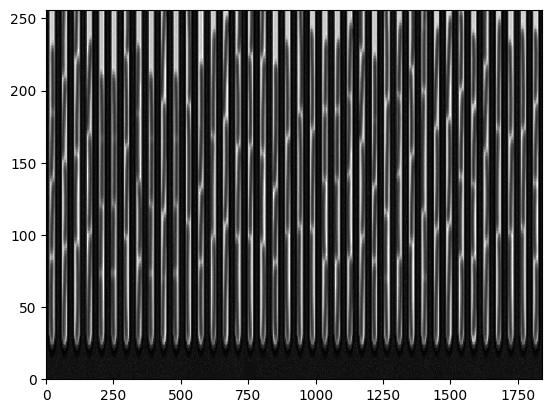

In [15]:
plt.pcolor(conv_tile,cmap="Greys_r")
plt.show()

In [17]:
type(conv_tile)

numpy.ndarray

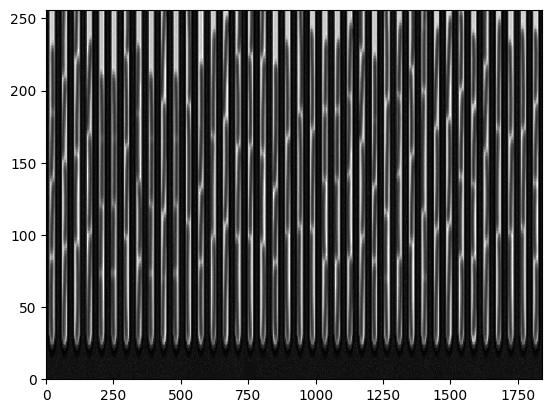

In [19]:
img = Image.fromarray(conv_tile).convert("L")
img = np.array(img)
plt.pcolor(img,cmap="Greys_r")
plt.show()

Intercept: 0.61
Slope: 0.50
AR(1) Coefficient: 0.76
AR(2) Coefficient: -0.37


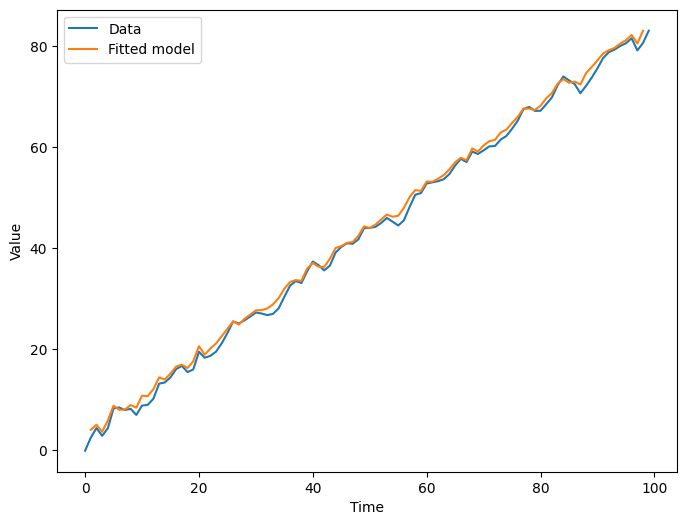

In [8]:
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(123)

# Define parameters
n = 100
alpha = 1
beta = 0.5
a1 = 0.7
a2 = -0.3

# Generate data from the model
t = np.arange(n)
y = alpha + beta*t + np.random.randn(n)
for i in range(2, n):
    y[i] = alpha + beta*t[i] + a1*y[i-1] + a2*y[i-2] + np.random.randn()

# Fit the model
X = sm.api.add_constant(t)
model = sm.tsa.ar_model.AutoReg(y, lags=2, trend='ct')
results = model.fit()

# Print the model parameters
print(f"Intercept: {results.params[0]:.2f}")
print(f"Slope: {results.params[1]:.2f}")
print(f"AR(1) Coefficient: {results.params[2]:.2f}")
print(f"AR(2) Coefficient: {results.params[3]:.2f}")

# Plot the generated data and the fitted model
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t, y, label='Data')
ax.plot(t[1:-1], results.fittedvalues, label='Fitted model')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()
